In [1]:
#building a model to predict Enterpreneural competency in univeristy using Deep-Learning 

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C:\\Users\sojore\Documents\Enterpreneural competency in univeristy\data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [4]:
#eploring the dataset
df.shape

(219, 17)

In [5]:
df.isnull().any()

EducationSector           False
IndividualProject         False
Age                       False
Gender                    False
City                      False
Influenced                False
Perseverance              False
DesireToTakeInitiative    False
Competitiveness           False
SelfReliance              False
StrongNeedToAchieve       False
SelfConfidence            False
GoodPhysicalHealth        False
MentalDisorder            False
KeyTraits                 False
ReasonsForLack             True
y                         False
dtype: bool

In [6]:
df.dtypes

EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
ReasonsForLack            object
y                          int64
dtype: object

In [7]:
df.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits',
       'ReasonsForLack', 'y'],
      dtype='object')

In [8]:
df.groupby('EducationSector')['EducationSector'].agg('count')

EducationSector
Art, Music or Design                                      21
Economic Sciences, Business Studies, Commerce and Law     32
Engineering Sciences                                     123
Humanities and Social Sciences                             5
Language and Cultural Studies                              1
Mathematics or Natural Sciences                            4
Medicine, Health Sciences                                 10
Others                                                    20
Teaching Degree (e.g., B.Ed)                               3
Name: EducationSector, dtype: int64

In [9]:
#i will next write a function to remove the comma in the EducationSector column n return only a string spaced by a space only
def convert_comma_to_string(x):
    res=x.split(',')
    y=len(res)
    if y==4:
        return res[0]+res[1]+res[2]+res[3]
    elif y==3:
        return res[0]+res[1]+res[2]
    elif y==2:
        return res[0]+res[1]
    elif y==1:
        return res[0]
    else:
        return None
        
convert_comma_to_string('Economic Sciences, Business Studies, Commerce and Law  ')

'Economic Sciences Business Studies Commerce and Law  '

In [10]:
df.EducationSector=df.EducationSector.apply(convert_comma_to_string)
df.sample(7)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
207,Engineering Sciences,Yes,21,Female,No,No,2,2,3,3,3,3,2,No,Positivity,NaN,1
50,Engineering Sciences,Yes,20,Male,Yes,Yes,2,2,2,3,3,3,2,No,Vision,NaN,1
144,Economic Sciences Business Studies Commerce an...,Yes,20,Male,Yes,Yes,3,4,3,5,4,3,2,Yes,Positivity,Just not interested! (Want to work in the corp...,0
114,Engineering Sciences,No,19,Male,Yes,Yes,4,4,4,5,5,4,5,No,Positivity,NaN,1
181,Engineering Sciences,Yes,22,Male,No,Yes,4,3,4,4,5,3,4,No,Passion,Just not interested! (Want to work in the corp...,0
100,Economic Sciences Business Studies Commerce an...,No,19,Female,Yes,Yes,4,3,3,4,5,4,3,No,Passion,Just not interested! (Want to work in the corp...,0
52,Teaching Degree (e.g. B.Ed),No,19,Male,Yes,Yes,3,2,2,2,3,1,2,No,Work Ethic,"Academic Pressure, Lack of Knowledge, Parental...",0


In [11]:
df1=df.drop(['ReasonsForLack','KeyTraits'],axis='columns')
df1.shape

(219, 15)

In [12]:
df1.head(2)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,0


In [13]:
df1=df1.replace(['Yes','No'],[1,0])
df1=df1.replace(['Male','Female'],[1,0])
df2=df1.copy()
df2.sample(2)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,y
127,Engineering Sciences,1,21,1,1,1,4,4,4,4,4,4,4,0,0
21,Engineering Sciences,0,21,0,1,1,4,5,4,4,5,4,4,0,0


In [14]:
df2.dtypes

EducationSector           object
IndividualProject          int64
Age                        int64
Gender                     int64
City                       int64
Influenced                 int64
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder             int64
y                          int64
dtype: object

Text(0, 0.5, 'count')

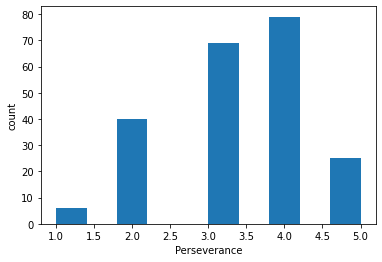

In [15]:
#outlier detection
#we gonna plot some histograms to visualize the data
plt.hist(df2.Perseverance,rwidth=3.2)
plt.xlabel('Perseverance')
plt.ylabel('count')

Text(0, 0.5, 'count')

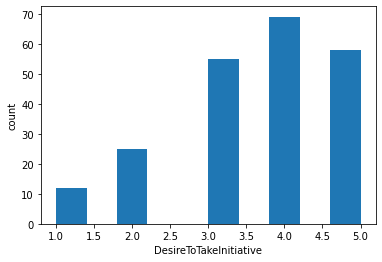

In [16]:
plt.hist(df2.DesireToTakeInitiative,rwidth=1.6)
plt.xlabel('DesireToTakeInitiative')
plt.ylabel('count')

Text(0, 0.5, 'count')

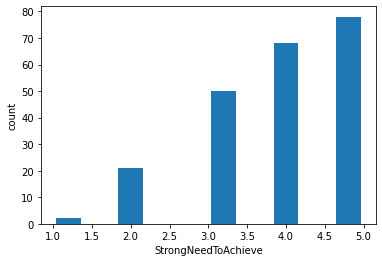

In [17]:
plt.hist(df2.StrongNeedToAchieve,rwidth=0.8)
plt.xlabel('StrongNeedToAchieve')
plt.ylabel('count')

Text(0, 0.5, 'count')

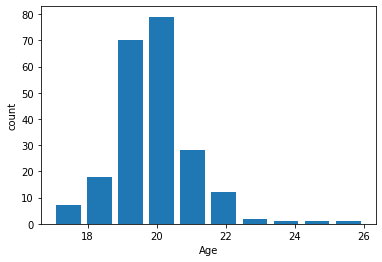

In [18]:
plt.hist(df2.Age,rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('count')

In [19]:
df2['StrongNeedToAchieve2']=df2['StrongNeedToAchieve']**2
df2['Age2']=df2['Age']**2
df2.head(2)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,y,StrongNeedToAchieve2,Age2
0,Engineering Sciences,0,19,1,1,0,2,2,3,3,2,2,3,1,1,4,361
1,Engineering Sciences,1,22,1,0,1,3,3,3,4,4,3,4,1,0,16,484


In [20]:
Q11=df2.Age2.quantile(0.25)
Q33=df2.Age2.quantile(0.75)
Q11,Q33

(361.0, 400.0)

In [21]:
IQR=Q33-Q11
ll1=Q11-IQR*1.5
ul1=Q33+IQR*1.5
IQR,ll1,ul1

(39.0, 302.5, 458.5)

In [22]:
df2[(df2.Age2<ll1) | (df2.Age2>ul1)]
df3=df2[(df2.Age2>=ll1) & (df2.Age2<=ul1)]
df3.shape

(195, 17)

In [23]:
ll2=df3.StrongNeedToAchieve2.quantile(0.1)
ul2=df3.StrongNeedToAchieve2.quantile(0.9)
ll2,ul2

(4.0, 25.0)

In [24]:
df3[(df3.StrongNeedToAchieve2<ll2) | (df3.StrongNeedToAchieve2>ul2)]
df4=df3[(df3.StrongNeedToAchieve2>=ll2) & (df3.StrongNeedToAchieve2<=ul2)]
df4.shape

(193, 17)

In [25]:
df4.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'y',
       'StrongNeedToAchieve2', 'Age2'],
      dtype='object')

In [26]:
df4.City.unique()

array([1, 0], dtype=int64)

In [27]:
df4['IndividualProject2']=df4['IndividualProject']**2
df4['City2']=df4['City']**2
df4['Perseverance2']=df4['Perseverance']**2
df4['DesireToTakeInitiative2']=df4['DesireToTakeInitiative']**2
df4['Competitiveness2']=df4['Competitiveness']**2
df4['SelfReliance2']=df4['SelfReliance']**2
df4['SelfConfidence2']=df4['SelfConfidence']**2
df4['GoodPhysicalHealth2']=df4['GoodPhysicalHealth']**2
df4.head(1)

<ipython-input-27-405046e26a5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['IndividualProject2']=df4['IndividualProject']**2
<ipython-input-27-405046e26a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['City2']=df4['City']**2
<ipython-input-27-405046e26a5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,StrongNeedToAchieve2,Age2,IndividualProject2,City2,Perseverance2,DesireToTakeInitiative2,Competitiveness2,SelfReliance2,SelfConfidence2,GoodPhysicalHealth2
0,Engineering Sciences,0,19,1,1,0,2,2,3,3,...,4,361,0,1,4,4,9,9,4,9


In [28]:
df4.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'y',
       'StrongNeedToAchieve2', 'Age2', 'IndividualProject2', 'City2',
       'Perseverance2', 'DesireToTakeInitiative2', 'Competitiveness2',
       'SelfReliance2', 'SelfConfidence2', 'GoodPhysicalHealth2'],
      dtype='object')

In [65]:
ll3=df4.Perseverance2.quantile(0.011)
ul3=df4.Perseverance2.quantile(0.999)
df4[(df4.Perseverance2<=ll3) | (df4.Perseverance2>=ul3)]
df5=df4[(df4.Perseverance2>ll3) & (df4.Perseverance2<ul3)]
df5.shape

(167, 25)

In [85]:
ll4=df5.DesireToTakeInitiative2.quantile(0.01)
ul4=df5.DesireToTakeInitiative2.quantile(0.99)
df5[(df5.DesireToTakeInitiative2<=ll4) | (df5.DesireToTakeInitiative2>ul4)]
df6=df5[(df5.DesireToTakeInitiative2>=ll4) & (df5.DesireToTakeInitiative2<=ul4)]
df6.shape

(167, 25)

In [87]:
ll5=df6.Competitiveness2.quantile(0.01)
ul5=df6.Competitiveness2.quantile(0.99)
df6[(df6.Competitiveness2<ll5) | (df6.Competitiveness2>ul5)]
df7=df6[(df6.Competitiveness2>ll5) & (df6.Competitiveness2<ul5)]
df7.shape

(127, 25)

In [89]:
ll6=df7.SelfReliance2.quantile(0.01)
ul6=df7.SelfReliance2.quantile(0.99)
df7[(df7.SelfReliance2<ll6) | (df7.SelfReliance2>ul6)]
df8=df7[(df7.SelfReliance2>ll6) & (df7.SelfReliance2<ul6)]
df8.shape

(105, 25)

In [90]:
ll7=df8.SelfConfidence2.quantile(0.01)
ul7=df8.SelfConfidence2.quantile(0.99)
df8[(df8.SelfConfidence2<=ll7) | (df8.SelfConfidence2>ul7)]
df9=df8[(df8.SelfConfidence2>=ll7) & (df8.SelfConfidence2<=ul7)]
df9.shape

(105, 25)

In [92]:
ll8=df9.GoodPhysicalHealth2.quantile(0.01)
ul8=df9.GoodPhysicalHealth2.quantile(0.99)
df9[(df9.GoodPhysicalHealth2<ll8) | (df9.GoodPhysicalHealth2>ul8)]
df10=df9[(df9.GoodPhysicalHealth2>=ll8) & (df9.GoodPhysicalHealth2<=ul8)]
df10.shape

(105, 25)

In [93]:
df10.sample(5)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,StrongNeedToAchieve2,Age2,IndividualProject2,City2,Perseverance2,DesireToTakeInitiative2,Competitiveness2,SelfReliance2,SelfConfidence2,GoodPhysicalHealth2
2,Engineering Sciences,0,18,1,1,0,3,4,3,3,...,9,324,0,1,9,16,9,9,16,16
50,Engineering Sciences,1,20,1,1,1,2,2,2,3,...,9,400,1,1,4,4,4,9,9,4
163,Art Music or Design,1,21,1,0,1,2,2,3,3,...,9,441,1,0,4,4,9,9,9,9
180,Others,1,20,0,1,0,4,5,4,4,...,9,400,1,1,16,25,16,16,25,25
139,Economic Sciences Business Studies Commerce an...,0,20,1,0,1,2,2,3,2,...,9,400,0,0,4,4,9,4,9,4


In [94]:
#converting the EducationSector values into a numerical dummy variable using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df10.EducationSector=le.fit_transform(df10.EducationSector)


Text(0, 0.5, 'count')

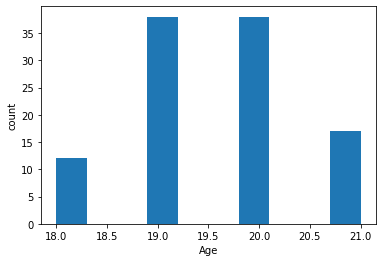

In [95]:
plt.hist(df10.Age,rwidth=3)
plt.xlabel('Age')
plt.ylabel('count')

In [96]:
#this is kinda of a normal distribution,pretty cool uuh

In [97]:
df10.columns

Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'y',
       'StrongNeedToAchieve2', 'Age2', 'IndividualProject2', 'City2',
       'Perseverance2', 'DesireToTakeInitiative2', 'Competitiveness2',
       'SelfReliance2', 'SelfConfidence2', 'GoodPhysicalHealth2'],
      dtype='object')

In [98]:
df11=df10.drop(['Age2','StrongNeedToAchieve2','IndividualProject2','City2','Perseverance2',
               'DesireToTakeInitiative2','Competitiveness2','SelfReliance2','SelfConfidence2',
               'GoodPhysicalHealth2'],axis=1)
df11.shape

(105, 15)

In [99]:
X=df11.drop('y',axis='columns')
X.shape

(105, 14)

In [100]:
y=df11.y
y.head()

0    1
2    0
3    0
4    1
5    1
Name: y, dtype: int64

In [101]:
#splitting my data for testing and training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [102]:
X_train.shape

(84, 14)

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [104]:
model=keras.Sequential([
    keras.layers.Dense(14,input_dim=14,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
11/11 [==============================] - 3s 9ms/step - loss: 2.6427 - accuracy: 0.5119
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 1.8958 - accuracy: 0.5357
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 2.3970 - accuracy: 0.5357
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 2.4708 - accuracy: 0.5476
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 2.1654 - accuracy: 0.4881
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 2.0532 - accuracy: 0.5357
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 1.5688 - accuracy: 0.5119
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 1.9180 - accuracy: 0.3452
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 1.2595 - accuracy: 0.4762
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 1.2522 - accuracy: 0.5595
Epoch 11

11/11 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5476
Epoch 82/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5595
Epoch 83/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5952
Epoch 84/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5952
Epoch 85/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7118 - accuracy: 0.5833
Epoch 86/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5714
Epoch 87/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.5833
Epoch 88/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6971 - accuracy: 0.5476
Epoch 89/100
11/11 [==============================] - 0s 19ms/step - loss: 0.7018 - accuracy: 0.5952
Epoch 90/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7130 - accuracy: 0.5714
Epoch 91/100

In [105]:
#testing my model on the test dataset
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 461ms/step - loss: 0.6725 - accuracy: 0.6667


[0.6725121140480042, 0.6666666865348816]

In [106]:
##my model is perfoming pretty okay now after doing some extra data clean up

In [107]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [108]:
y_test[:10]

174    1
67     0
94     0
91     0
170    0
81     1
122    1
164    0
4      1
80     1
Name: y, dtype: int64

In [109]:
#my ANN model isnt perfoming pretty good,lets use ML algorithms
#ways to improve the above models perfomance
#*training the model on a huge dataset
#*running more epochs...

In [110]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [112]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [113]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,-0.297999,{'normalize': False}
1,lasso,-0.048071,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-1.148182,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,svm,0.588235,"{'C': 1, 'kernel': 'rbf'}"
4,random_forest,0.458824,{}
5,logistic_regression,0.552941,{}


In [114]:
model1=SVC()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.6666666666666666

In [115]:
y_prediction=model1.predict(X_test)
y_prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
y_test[:10]

174    1
67     0
94     0
91     0
170    0
81     1
122    1
164    0
4      1
80     1
Name: y, dtype: int64

Text(159.0, 0.5, 'Truth')

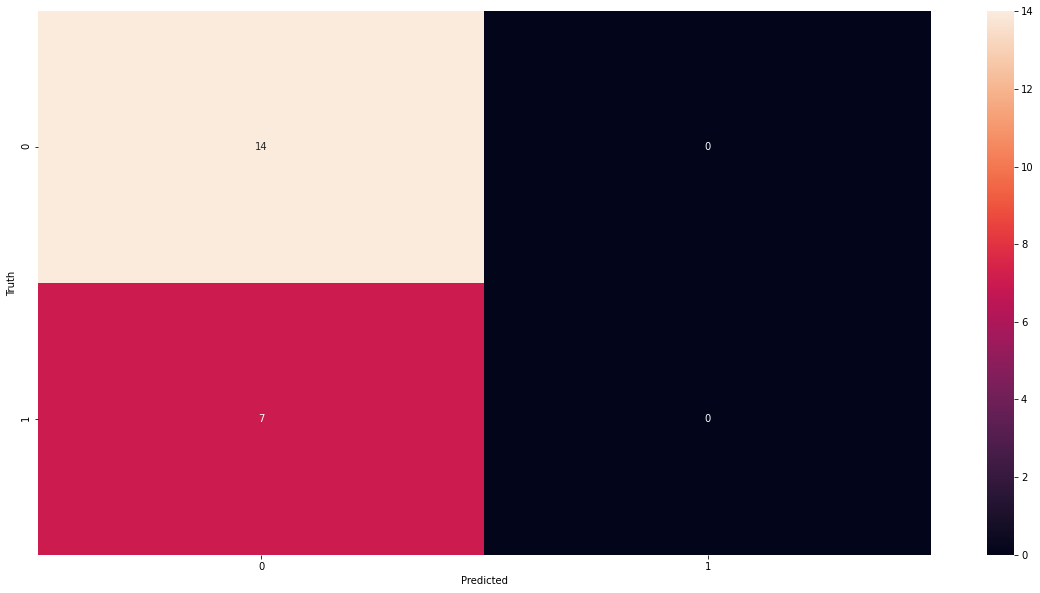

In [117]:
#both models have a similar perfomance
#cleaning up the data a little more will improve these models perfomances
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_prediction))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
